In [72]:
import pandas as pd
import numpy as np
import random as rn
import math
from datetime import date
from dateutil.relativedelta import relativedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import gc 
import json
plt.style.use('seaborn')

In [73]:
#Loading the JSON data
data = pd.read_json('PA_test_data.json')

**This notebook has been divided into sections to easily navigate and understand workings**

# **Section 1: Understanding data**

In [74]:
type(data)

pandas.core.frame.DataFrame

In [75]:
#Converting JSON to pandas df
df = pd.DataFrame(data)

In [76]:
df.head(5)

,ctype,cid,delivery_type,sherpa_flag,target_segment,ttl,date,sent,impressions,paplus_sent,imp,app_name,chk_flag
1,TXN API Push,5f76dca5d69d380756710da6,later,SMV,custom_segment,43200,2020-11-11,0,6,0,0,Songswala,6
2,TXN API Push,5d95c4c4287853101776a97a,soon,SMV,User,43200,2020-11-15,77993,70934,0,0,Sabziwala,148927
3,ST Push,5e8b11e4e3ca782085182ce1,later,0,custom_filters,21600,2020-11-12,3344,2457,0,0,TVwala,5801
6,TXN API Push,5fc17fda119bd90684d75d03,soon,SMV,User,43200,2020-11-27,2,1,0,0,Armwala,3
7,TXN API Push,5ed0e1dba161e50754b65400,soon,SMV,User,129600,2020-11-07,0,1,0,0,TVwala,1


In [77]:
#Understanding the shape of data
print(len(df))
print(df.shape)
print(df.dtypes)

106699
(106699, 13)
ctype                     object
cid                       object
delivery_type             object
sherpa_flag               object
target_segment            object
ttl                        int64
date              datetime64[ns]
sent                       int64
impressions                int64
paplus_sent                int64
imp                        int64
app_name                  object
chk_flag                   int64
dtype: object


In [78]:
#Checking for Nulls in data
df.isnull().sum()

ctype             0
cid               0
delivery_type     0
sherpa_flag       0
target_segment    0
ttl               0
date              0
sent              0
impressions       0
paplus_sent       0
imp               0
app_name          0
chk_flag          0
dtype: int64

No Nulls in the data

In [79]:
#overall distribution of numeric variables
df.describe()

,ttl,sent,impressions,paplus_sent,imp,chk_flag
count,1.066990e+05,1.066990e+05,1.066990e+05,1.066990e+05,1.066990e+05,1.066990e+05
mean,1.055786e+05,1.158431e+05,5.284458e+04,4.910934e+03,3.628217e+03,1.686877e+05
std,5.065333e+04,1.311482e+06,5.400473e+05,9.055159e+04,6.527142e+04,1.829556e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.320000e+04,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,1.296000e+05,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
75%,1.296000e+05,1.186500e+03,6.630000e+02,0.000000e+00,0.000000e+00,1.987000e+03
max,1.800000e+06,7.495949e+07,2.603849e+07,4.658017e+06,3.339745e+06,9.682679e+07


In [80]:
# Data types
print(df.dtypes)

ctype                     object
cid                       object
delivery_type             object
sherpa_flag               object
target_segment            object
ttl                        int64
date              datetime64[ns]
sent                       int64
impressions                int64
paplus_sent                int64
imp                        int64
app_name                  object
chk_flag                   int64
dtype: object


In [81]:
#Unique App Names
df['app_name'].unique()

array(['Songswala', 'Sabziwala', 'TVwala', 'Armwala', 'Gharwala',
       'Phonewala', 'Clothwala', 'Blimoetest', 'Gharwala_2', 'ABC_Prod',
       'Set_IND', 'Wholesale_prod', 'babywala', 'Dailyprod', 'Malay_prod',
       'UAE_Prod', 'MyTestmoetest', 'Life_IND', 'Daily2_production',
       'Life_max', 'TripTest', 'Book_test', 'Style_IND', 'Scooterportal',
       'Fashion4prod', 'MMS', 'paintIND', 'ShoesKUL', 'RVAPROD',
       'LeranNow', 'Moviesmoetest', 'BitcoinCX', 'ClientDemomoetest',
       'GoldProduction', 'dev_solmoetest', 'chopcutsmoetest',
       'ChampionProd', 'rentalmoetest', 'id_dealers', 'nineten_ind',
       'astro_hindi', 'apmcprod', 'box_prod', 'MoEngageDemoAppMoeTest',
       'Benganmoetest', 'DemoAppmoetest', 'scootersPROD', 'voxboxmoetest',
       'uae_cluster_uat', 'mensblogmoetest', 'open_mindapp', 'bikebuddy',
       'doorsmoetest', 'delivery_ecommoetest', 'biggerprod',
       'grocery_moetest', 'dokterkonsult'], dtype=object)

In [82]:
#sherpa flag uniques
df['sherpa_flag'].unique()

array(['SMV', 0, 'DMV'], dtype=object)

In [83]:
#delivery type uniques
df['delivery_type'].unique()

array(['later', 'soon', 'periodic', 0], dtype=object)

In [84]:
#target_segment uniques
df['target_segment'].unique()

array(['custom_segment', 'User', 'custom_filters', 'allusers'],
      dtype=object)

# Section 2 : EDA







### What are the factors effecting the advertising and marketing campaigns?

#### a. TVwala ,Phonewala,Songswala are the dominant apps

                        count  uniquecampaigns
app_name                                      
TVwala                  32873             9432
Phonewala               27904             4601
Songswala               15101             2706
Malay_prod               6394             1527
Armwala                  6324             6038
Sabziwala                2167              383
Clothwala                1531              957
Gharwala                 1252              587
Wholesale_prod           1207              168
Daily2_production        1065              534
UAE_Prod                  889              482
Life_max                  824              659
TripTest                  822              103
paintIND                  806              587
babywala                  802              428
ABC_Prod                  782              390
Scooterportal             748               35
Gharwala_2                740               95
Style_IND                 592              484
Dailyprod    

<AxesSubplot:xlabel='app_name'>

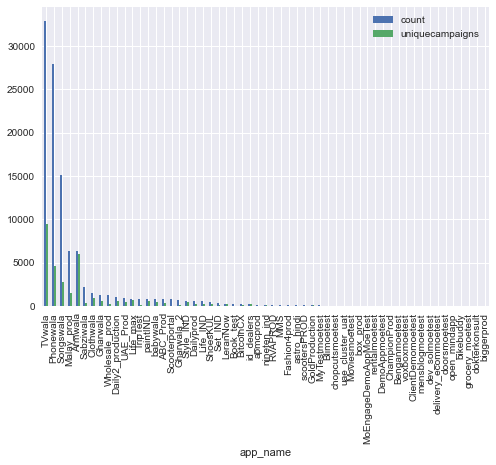

In [85]:
#App
res = df.groupby('app_name').agg(count=pd.NamedAgg(column='app_name', aggfunc='count'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique')
    ).sort_values('count',ascending=False)
print(res)
res.plot(kind='bar' )


#### b. "Later" and "Soon" are the 2 major delivery types. That is, majority of campaigns are either sent as soon as campaign is created or later for future*

               count  uniquecampaigns
delivery_type                        
later          58136            10558
soon           43610            16563
periodic        4945             4945
0                  8                6


<AxesSubplot:xlabel='delivery_type'>

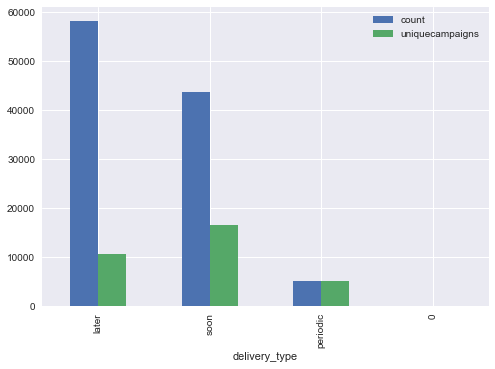

In [86]:
#Delivery type
res = df.groupby('delivery_type').agg(count=pd.NamedAgg(column='app_name', aggfunc='count'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique')
    ).sort_values('count',ascending=False)
print(res)
res.plot(kind='bar' )

 #### c. Majority of campaigns are run on static AB configuration


             count  uniquecampaigns
sherpa_flag                        
SMV          57542            16776
0            33454            11654
DMV          15703             3642


<AxesSubplot:xlabel='sherpa_flag'>

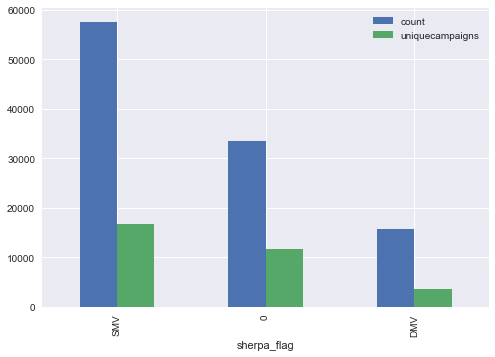

In [87]:
#Sherpa_flag
res = df.groupby('sherpa_flag').agg(count=pd.NamedAgg(column='app_name', aggfunc='count'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique')
    ).sort_values('count',ascending=False)
print(res)
res.plot(kind='bar' )

#### d. Majority of unique campaigns are TXN API push or general push

                  count  uniquecampaigns
ctype                                   
TXN API Push      53918            16346
ST Push           39191             2186
General Push      13534            13534
Geo-fencing Push     44                4
RT Push              12                2


<AxesSubplot:xlabel='ctype'>

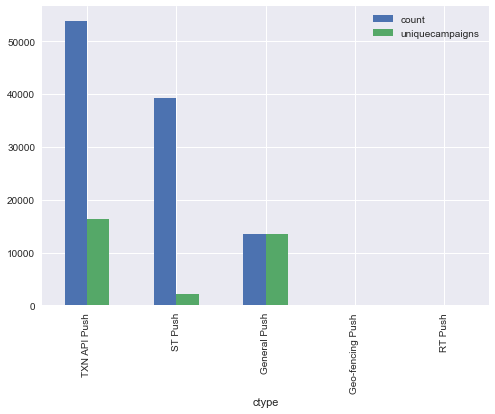

In [88]:
#campaign type
res = df.groupby('ctype').agg(count=pd.NamedAgg(column='app_name', aggfunc='count'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique')
    ).sort_values('count',ascending=False)
print(res)
res.plot(kind='bar' )

#### e. Majority of unique campaigns are targetted towards all users or custom filtered users

                count  uniquecampaigns
target_segment                        
User            39841            15460
allusers        28448             2398
custom_filters  24410            13402
custom_segment  14000              812


<AxesSubplot:xlabel='target_segment'>

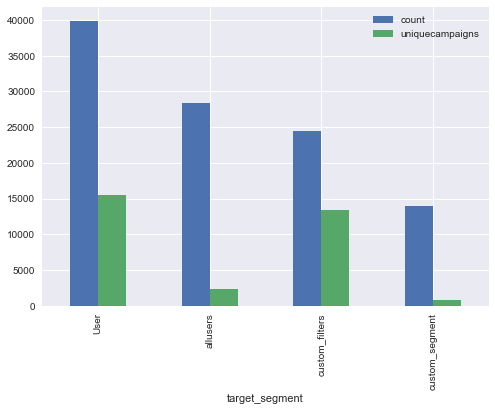

In [89]:
#target_segment
# Majority of unique campaigns are targetted towards all users or custom filtered users
res = df.groupby('target_segment').agg(count=pd.NamedAgg(column='app_name', aggfunc='count'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique')
    ).sort_values('count',ascending=False)
print(res)
res.plot(kind='bar' )

#### f. Most campaigns have TTL as 129600.0 or 43200.0

         count  uniquecampaigns
ttl                            
1800000     30                1
864000       4                1
518400      24               24
356400      17               17
259200      34                2
172800     619              149
129600   75737            20325
126000       3                3
108000       6                6
100800       3                1
86400     2399              659
72000       22                1
68400        1                1
64800        1                1
61200       97               43
57600        7                2
54000      793              793
50400        9                9
46800        1                1
43200    20696             6862
39600       83               40
36000       31               31
32400        3                3
28800       94               94
25200        8                8
21600     1713              182
18000      861              825
14400     2645             1339
10800      357              350
9000    

<AxesSubplot:xlabel='ttl'>

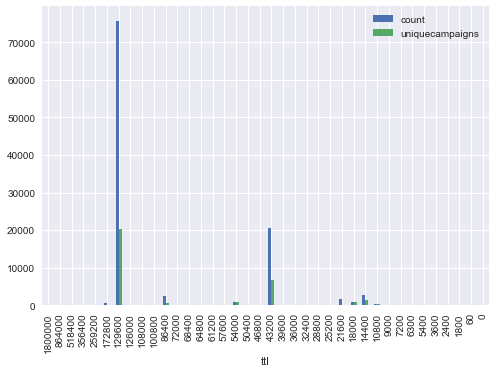

In [90]:
#Time to live
#Most campaigns have TTL as 129600.0 or 43200.0
res = df.groupby('ttl').agg(count=pd.NamedAgg(column='app_name', aggfunc='count'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique')
    ).sort_values('ttl',ascending=False)
print(res)
res.plot(kind='bar' )

# Section 3: Understading Campaign performance

### What are the factors effecting the campaing performance

            count  uniquecampaigns
date                              
2020-11-01   3565             3565
2020-11-02   3434             3434
2020-11-03   3531             3531
2020-11-04   3469             3469
2020-11-05   3308             3308
2020-11-06   3426             3426
2020-11-07   3408             3408
2020-11-08   3488             3488
2020-11-09   3294             3294
2020-11-10   3708             3708
2020-11-11   3495             3495
2020-11-12   3497             3497
2020-11-13   3286             3286
2020-11-14   3217             3217
2020-11-15   3548             3548
2020-11-16   3540             3540
2020-11-17   3389             3389
2020-11-18   3831             3831
2020-11-19   3928             3928
2020-11-20   3675             3675
2020-11-21   3768             3768
2020-11-22   3494             3494
2020-11-23   3497             3497
2020-11-24   3513             3513
2020-11-25   3630             3630
2020-11-26   3707             3707
2020-11-27   4206   

<AxesSubplot:xlabel='date'>

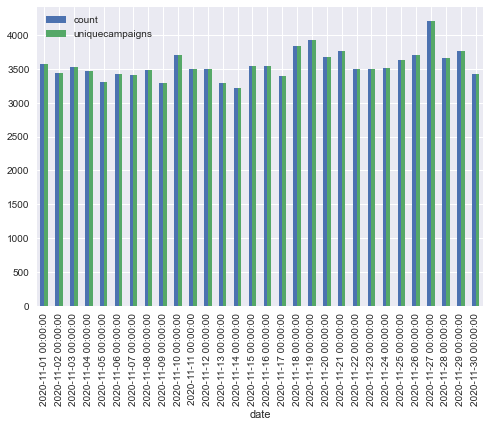

In [91]:
#date
# Daily performance of NOV 2020 campaigns
res = df.groupby('date').agg(count=pd.NamedAgg(column='app_name', aggfunc='count'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique')
    ).sort_values('date',ascending=True)
print(res)
res.plot(kind='bar' )

In [92]:
df['ctype'].value_counts()

TXN API Push        53918
ST Push             39191
General Push        13534
Geo-fencing Push       44
RT Push                12
Name: ctype, dtype: int64

<AxesSubplot:xlabel='ctype,date'>

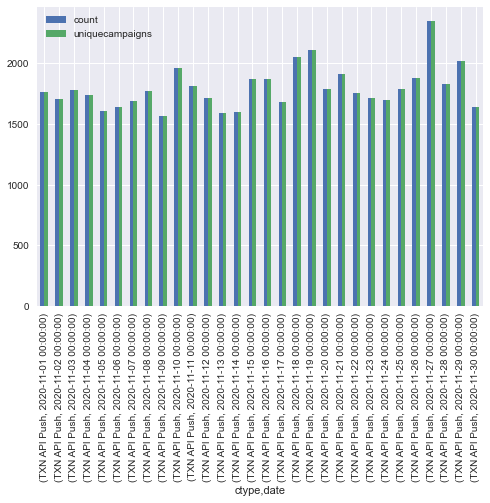

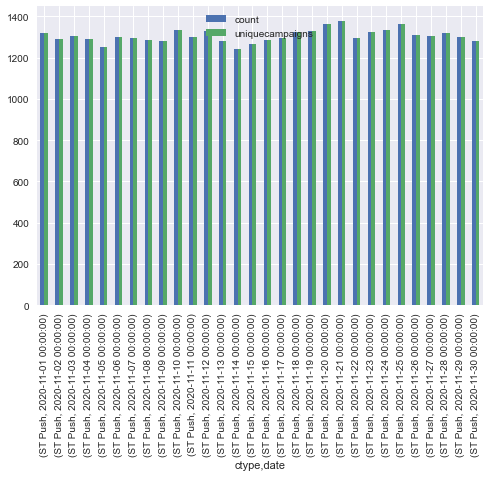

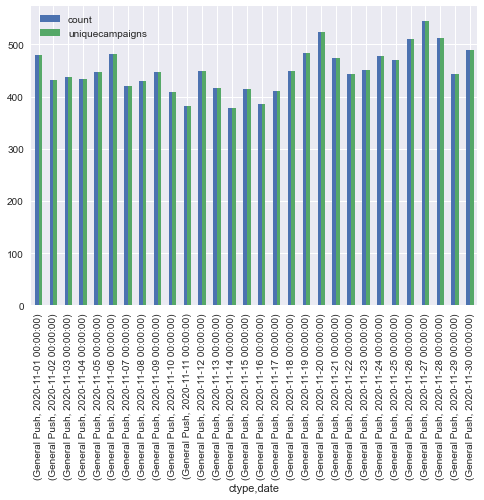

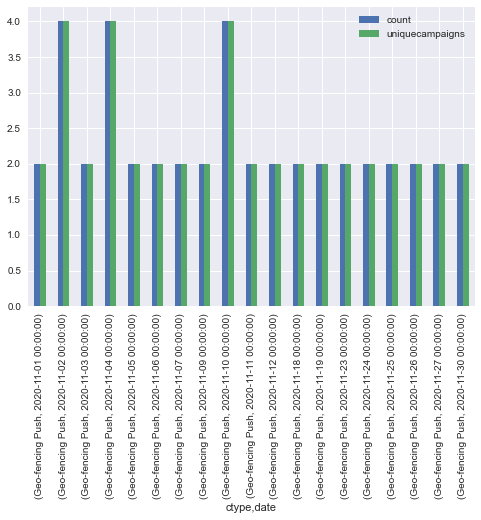

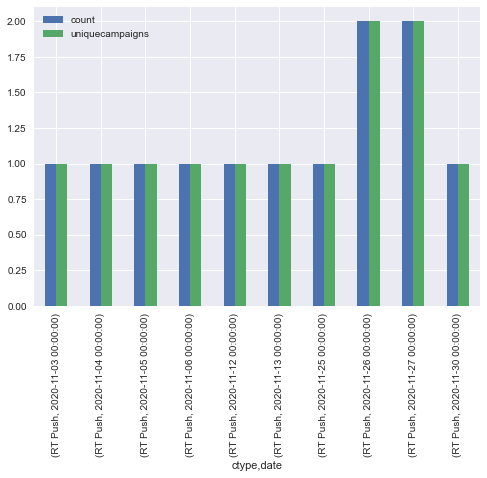

In [93]:
#date x Campaign type
# Daily performance of campaigns of NOV 2020 campaigns - TXN API push campaigns
res = df[df['ctype'] == "TXN API Push"].groupby(['ctype','date']).agg(count=pd.NamedAgg(column='app_name', aggfunc='count'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique')
    ).sort_values('date',ascending=True)
res.plot(kind='bar' )

# Daily performance of campaigns of NOV 2020 campaigns - ST push campaigns
res = df[df['ctype'] == "ST Push"].groupby(['ctype','date']).agg(count=pd.NamedAgg(column='app_name', aggfunc='count'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique')
    ).sort_values('date',ascending=True)
res.plot(kind='bar' )

# Daily performance of campaigns of NOV 2020 campaigns - General Push campaigns
res = df[df['ctype'] == "General Push"].groupby(['ctype','date']).agg(count=pd.NamedAgg(column='app_name', aggfunc='count'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique')
    ).sort_values('date',ascending=True)
res.plot(kind='bar' )

# Daily performance of campaigns of NOV 2020 campaigns - Geo-fencing Push campaigns
res = df[df['ctype'] == "Geo-fencing Push"].groupby(['ctype','date']).agg(count=pd.NamedAgg(column='app_name', aggfunc='count'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique')
    ).sort_values('date',ascending=True)
res.plot(kind='bar' )

# Daily performance of campaigns of NOV 2020 campaigns - RT Push campaigns
res = df[df['ctype'] == "RT Push"].groupby(['ctype','date']).agg(count=pd.NamedAgg(column='app_name', aggfunc='count'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique')
    ).sort_values('date',ascending=True)
res.plot(kind='bar' )


#### Overall noti performance measures*

> Noti sent, received, PaPlus noti sent, PAplus noti received, Deivery rate overall and PAPlus delivery rate



In [94]:
#Checking the noti performance -overall level
overalltotalnoti_sent = df['sent'].sum()
overalltotalnoti_imp = df['impressions'].sum()
overall_paplusnoti_sent = df['paplus_sent'].sum()
overall_paplusnoti_imp = df['imp'].sum()
overall_uniquecampaigns = df['cid'].nunique()

print('Total Noti sent: {} '.format(overalltotalnoti_sent))
print('Total Noti Received: {} '.format(overalltotalnoti_imp))
print('Total PaPlus Noti sent: {} '.format(overall_paplusnoti_sent))
print('Total PaPlus Noti Received: {} '.format(overall_paplusnoti_imp))
print('Total Noti Delivery rate: {} '.format((overalltotalnoti_imp/overalltotalnoti_sent)*100))
print('Total PaPlus Noti Delivery rate: {} '.format((overall_paplusnoti_imp/overall_paplusnoti_sent)*100))
print('Total unique campaigns : {} '.format(overall_uniquecampaigns))

Total Noti sent: 12360346424 
Total Noti Received: 5638463813 
Total PaPlus Noti sent: 523991757 
Total PaPlus Noti Received: 387127087 
Total Noti Delivery rate: 45.61736070804483 
Total PaPlus Noti Delivery rate: 73.88037728234721 
Total unique campaigns : 32072 


#### Phonewala,SongWala, TVWala, Malay_prod which engage highest for notis, see delivery rate avg of 46.7% while their PAPlus delivery rates are greatly higher with around 75% PAPlus delivery rate

In [95]:
#Checking the noti performance per app
res= df.groupby('app_name').agg(paplus_sent=pd.NamedAgg(column='paplus_sent', aggfunc='sum'),
    paplus_imp=pd.NamedAgg(column='imp', aggfunc='sum'),
    totalnoti_sent=pd.NamedAgg(column='sent', aggfunc='sum'),
    totalnoti_imp=pd.NamedAgg(column='impressions', aggfunc='sum'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique'),
    ).sort_values('totalnoti_sent',ascending=False)
res['delivery_rate_percentage']=(res['totalnoti_imp']/res['totalnoti_sent'])*100
res['delivery_rate_paplus_percentage']=(res['paplus_imp']/res['paplus_sent'])*100
res.sort_values(by=['totalnoti_sent','delivery_rate_percentage'],ascending=False)
    

,paplus_sent,paplus_imp,totalnoti_sent,totalnoti_imp,uniquecampaigns,delivery_rate_percentage,delivery_rate_paplus_percentage
app_name,,,,,,,
Phonewala,17,3,5195426125,2076166494,4601,39.961428,17.647059
Songswala,234334472,178749349,3223317122,1401278435,2706,43.473179,76.279579
TVwala,152128294,113972012,1501468041,729222829,9432,48.567323,74.918353
Malay_prod,137365193,94332567,1139362289,625132201,1527,54.866850,68.672831
Set_IND,0,0,322437478,255410488,145,79.212407,NaN
Life_IND,0,0,176116896,134708405,220,76.488064,NaN
Sabziwala,0,0,148096562,112946709,383,76.265585,NaN
Clothwala,0,0,145504968,69329872,957,47.647770,NaN
Life_max,0,0,103569982,57213339,659,55.241237,NaN


In [96]:
print(df.dtypes)

ctype                     object
cid                       object
delivery_type             object
sherpa_flag               object
target_segment            object
ttl                        int64
date              datetime64[ns]
sent                       int64
impressions                int64
paplus_sent                int64
imp                        int64
app_name                  object
chk_flag                   int64
dtype: object


In [97]:
# Adding week into data. 1-7 first week, 8-14 second week so on
df['date'] = pd.to_datetime(df['date'], errors ='coerce') 
df['dateweek'] = df['date'].apply(lambda x: math.ceil(x.day/7))

In [98]:
print(df.dtypes)

ctype                     object
cid                       object
delivery_type             object
sherpa_flag               object
target_segment            object
ttl                        int64
date              datetime64[ns]
sent                       int64
impressions                int64
paplus_sent                int64
imp                        int64
app_name                  object
chk_flag                   int64
dateweek                   int64
dtype: object


In [99]:
#Checking the noti performance by date
res= df.groupby('date').agg(paplus_sent=pd.NamedAgg(column='paplus_sent', aggfunc='sum'),
    paplus_imp=pd.NamedAgg(column='imp', aggfunc='sum'),
    totalnoti_sent=pd.NamedAgg(column='sent', aggfunc='sum'),
    totalnoti_imp=pd.NamedAgg(column='impressions', aggfunc='sum'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique'),
    ).sort_values('totalnoti_sent',ascending=False)
res['delivery_rate_percentage']=(res['totalnoti_imp']/res['totalnoti_sent'])*100
res['delivery_rate_paplus_percentage']=(res['paplus_imp']/res['paplus_sent'])*100
res.sort_values(by=['date'],ascending=True)
    

,paplus_sent,paplus_imp,totalnoti_sent,totalnoti_imp,uniquecampaigns,delivery_rate_percentage,delivery_rate_paplus_percentage
date,,,,,,,
2020-11-01,11701235,8402957,378043235,182903095,3565,48.381528,71.812565
2020-11-02,15261110,10331704,421832411,177521844,3434,42.083500,67.699558
2020-11-03,16759991,12157194,434955521,175850922,3531,40.429633,72.536996
2020-11-04,11669840,7949572,397497057,171973592,3469,43.264117,68.120660
2020-11-05,18439588,12141108,352234308,164224355,3308,46.623611,65.842621
2020-11-06,15238635,10442808,433245879,183752503,3426,42.412983,68.528500
2020-11-07,8604978,6537997,368956458,174352802,3408,47.255658,75.979241
2020-11-08,12992122,9943137,454870288,207502746,3488,45.618004,76.532048
2020-11-09,16732297,12843080,361118750,171092974,3294,47.378591,76.756228


In [100]:
df.date.head()

1   2020-11-11
2   2020-11-15
3   2020-11-12
6   2020-11-27
7   2020-11-07
Name: date, dtype: datetime64[ns]

In [101]:
pd.to_datetime(df['date'], errors ='coerce').head()

1   2020-11-11
2   2020-11-15
3   2020-11-12
6   2020-11-27
7   2020-11-07
Name: date, dtype: datetime64[ns]

In [102]:
pd.to_datetime(df['date'], errors ='coerce').dt.day.head()

1    11
2    15
3    12
6    27
7     7
Name: date, dtype: int64

In [103]:
df.date.head()

1   2020-11-11
2   2020-11-15
3   2020-11-12
6   2020-11-27
7   2020-11-07
Name: date, dtype: datetime64[ns]

In [104]:
df['date'].apply(lambda x: math.ceil(x.day/7)).head()

1    2
2    3
3    2
6    4
7    1
Name: date, dtype: int64

In [105]:
df['date'].apply(lambda x: (x.day/7)).head()

1    1.571429
2    2.142857
3    1.714286
6    3.857143
7    1.000000
Name: date, dtype: float64

## Weekly performance

In [106]:
#Checking the noti performance by week
res= df.groupby('dateweek').agg(paplus_sent=pd.NamedAgg(column='paplus_sent', aggfunc='sum'),
    paplus_imp=pd.NamedAgg(column='imp', aggfunc='sum'),
    totalnoti_sent=pd.NamedAgg(column='sent', aggfunc='sum'),
    totalnoti_imp=pd.NamedAgg(column='impressions', aggfunc='sum'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique'),
    ).sort_values('totalnoti_sent',ascending=False)
res['delivery_rate_percentage']=(res['totalnoti_imp']/res['totalnoti_sent'])*100
res['delivery_rate_paplus_percentage']=(res['paplus_imp']/res['paplus_sent'])*100
res.reset_index( inplace=True)
res.sort_values(by=['dateweek'],ascending=True)


,dateweek,paplus_sent,paplus_imp,totalnoti_sent,totalnoti_imp,uniquecampaigns,delivery_rate_percentage,delivery_rate_paplus_percentage
2,1,97675377,67963340,2786764869,1230579113,10904,44.157981,69.580832
1,2,105693729,81964243,2905276830,1284871645,10378,44.225446,77.548823
3,3,90784317,70983982,2502764701,1142339996,11339,45.643124,78.189697
0,4,162601292,117097189,3215896924,1524302037,10998,47.398971,72.014919
4,5,67237042,49118333,949643100,456371022,5110,48.057109,73.052489


<BarContainer object of 5 artists>

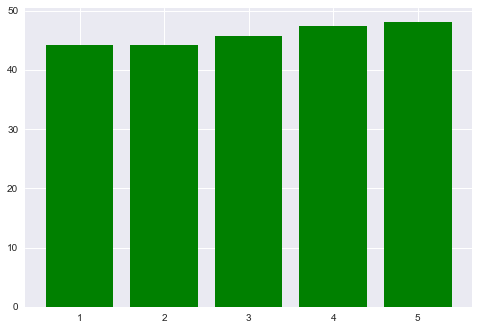

In [107]:
#Checking the noti performance by week
res= df.groupby('dateweek').agg(paplus_sent=pd.NamedAgg(column='paplus_sent', aggfunc='sum'),
    paplus_imp=pd.NamedAgg(column='imp', aggfunc='sum'),
    totalnoti_sent=pd.NamedAgg(column='sent', aggfunc='sum'),
    totalnoti_imp=pd.NamedAgg(column='impressions', aggfunc='sum'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique'),
    ).sort_values('totalnoti_sent',ascending=False)
res['delivery_rate_percentage']=(res['totalnoti_imp']/res['totalnoti_sent'])*100
res['delivery_rate_paplus_percentage']=(res['paplus_imp']/res['paplus_sent'])*100
res.reset_index( inplace=True)
res.sort_values(by=['dateweek'],ascending=True)
#plt.bar(res['dateweek'],res['paplus_sent'],color='orange')
plt.bar(res['dateweek'],res['delivery_rate_percentage'],color='green')

#### Noti Delivery rate is increasing through weeks.
#### PA plus delivery rate constantly higher than normal notis

<AxesSubplot:xlabel='dateweek'>

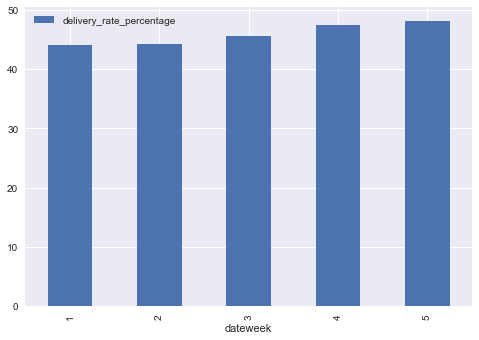

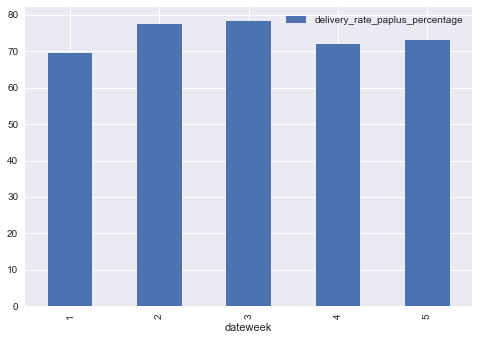

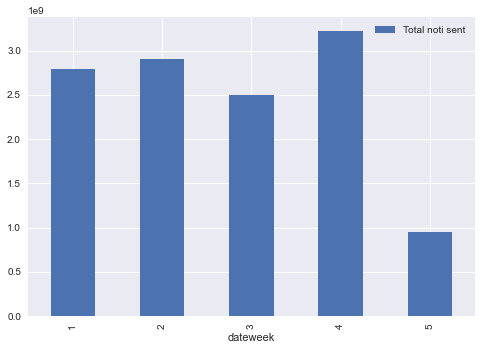

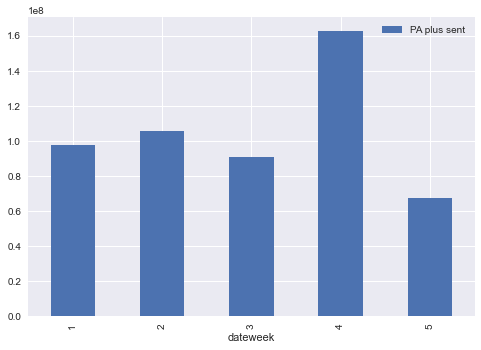

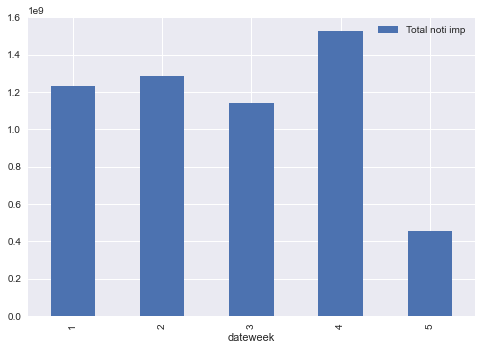

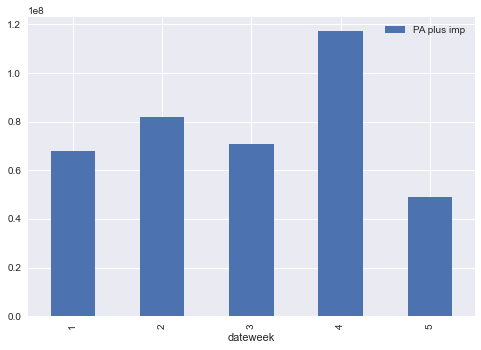

In [108]:
res.sort_values(by=['dateweek'],ascending=True).plot("dateweek", "delivery_rate_percentage", kind="bar", label = 'delivery_rate_percentage')
res.sort_values(by=['dateweek'],ascending=True).plot("dateweek", "delivery_rate_paplus_percentage", kind="bar", label = 'delivery_rate_paplus_percentage')

res.sort_values(by=['dateweek'],ascending=True).plot("dateweek", "totalnoti_sent", kind="bar", label = 'Total noti sent')
res.sort_values(by=['dateweek'],ascending=True).plot("dateweek", "paplus_sent", kind="bar", label = 'PA plus sent')

res.sort_values(by=['dateweek'],ascending=True).plot("dateweek", "totalnoti_imp", kind="bar", label = 'Total noti imp')
res.sort_values(by=['dateweek'],ascending=True).plot("dateweek", "paplus_imp", kind="bar", label = 'PA plus imp')

In [109]:
df.dtypes

ctype                     object
cid                       object
delivery_type             object
sherpa_flag               object
target_segment            object
ttl                        int64
date              datetime64[ns]
sent                       int64
impressions                int64
paplus_sent                int64
imp                        int64
app_name                  object
chk_flag                   int64
dateweek                   int64
dtype: object

In [110]:
#Checking the noti performance by week per campaign type
res= df.groupby(['ctype','dateweek']).agg(paplus_sent=pd.NamedAgg(column='paplus_sent', aggfunc='sum'),
    paplus_imp=pd.NamedAgg(column='imp', aggfunc='sum'),
    totalnoti_sent=pd.NamedAgg(column='sent', aggfunc='sum'),
    totalnoti_imp=pd.NamedAgg(column='impressions', aggfunc='sum'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique'),
    ).sort_values('totalnoti_sent',ascending=False)
res['delivery_rate_percentage']=(res['totalnoti_imp']/res['totalnoti_sent'])*100
res['delivery_rate_paplus_percentage']=(res['paplus_imp']/res['paplus_sent'])*100
res.reset_index( inplace=True)
res.sort_values(by=['ctype','dateweek'],ascending=True)
#plt.bar(res['ctype','dateweek'],res['delivery_rate_percentage'],color='green')

,ctype,dateweek,paplus_sent,paplus_imp,totalnoti_sent,totalnoti_imp,uniquecampaigns,delivery_rate_percentage,delivery_rate_paplus_percentage
2,General Push,1,96936115,67357364,2563657787,1125317261,3133,43.894987,69.486346
1,General Push,2,104430426,80941564,2667609942,1171670331,2913,43.922101,77.507645
3,General Push,3,90605807,70846563,2304109277,1050336622,3143,45.585365,78.192078
0,General Push,4,162544347,117048979,2996018523,1422295896,3412,47.472867,72.010489
4,General Push,5,67232225,49114063,886889170,427466272,933,48.198387,73.051372
18,Geo-fencing Push,1,0,0,63,64,4,101.587302,NaN
17,Geo-fencing Push,2,0,0,84,84,4,100.000000,NaN
15,Geo-fencing Push,3,0,0,184,102,2,55.434783,NaN
16,Geo-fencing Push,4,0,0,174,170,2,97.701149,NaN
21,Geo-fencing Push,5,0,0,8,8,2,100.000000,NaN


<AxesSubplot:xlabel='dateweek'>

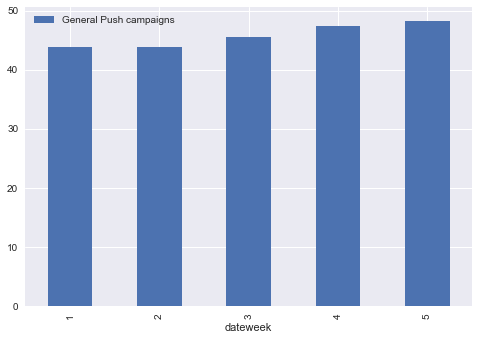

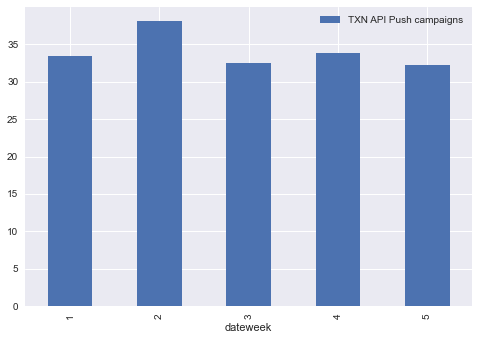

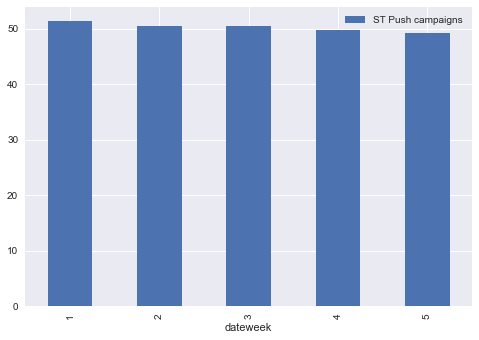

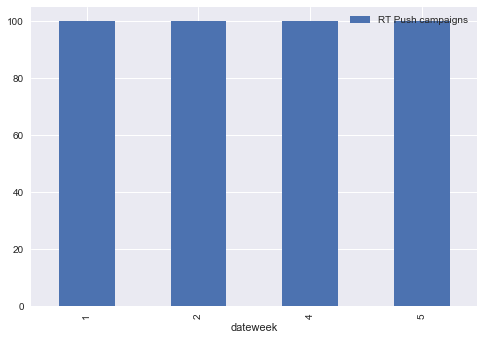

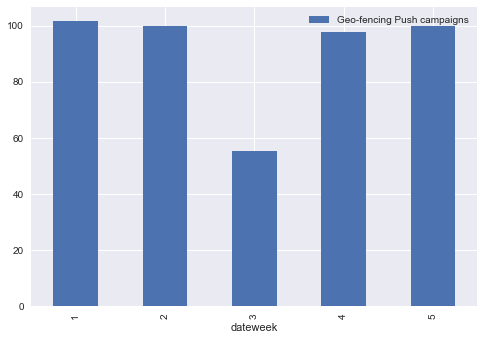

In [111]:
#Delivery rates over weeks per campaing types
res[res['ctype']=='General Push'].sort_values(by=['dateweek'],ascending=True).plot("dateweek", "delivery_rate_percentage", kind="bar", label = 'General Push campaigns')
res[res['ctype']=='TXN API Push'].sort_values(by=['dateweek'],ascending=True).plot("dateweek", "delivery_rate_percentage", kind="bar", label = 'TXN API Push campaigns')
res[res['ctype']=='ST Push'].sort_values(by=['dateweek'],ascending=True).plot("dateweek", "delivery_rate_percentage", kind="bar", label = 'ST Push campaigns')
res[res['ctype']=='RT Push'].sort_values(by=['dateweek'],ascending=True).plot("dateweek", "delivery_rate_percentage", kind="bar", label = 'RT Push campaigns')
res[res['ctype']=='Geo-fencing Push'].sort_values(by=['dateweek'],ascending=True).plot("dateweek", "delivery_rate_percentage", kind="bar", label = 'Geo-fencing Push campaigns')



#### General push campaigns see increase in delivery rates over weeks.
#### Txn API push campaigns see higher delivery rates in week 2 and 4









## Contrasting between AMP plus and non AMP plus

In [112]:
#APPs which use AMP plus
res= df[(df['paplus_sent'] >0) ].groupby(['dateweek']).agg(paplus_sent=pd.NamedAgg(column='paplus_sent', aggfunc='sum'),
    paplus_imp=pd.NamedAgg(column='imp', aggfunc='sum'),
    totalnoti_sent=pd.NamedAgg(column='sent', aggfunc='sum'),
    totalnoti_imp=pd.NamedAgg(column='impressions', aggfunc='sum'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique'),
    ).sort_values('totalnoti_sent',ascending=False)
res['delivery_rate_percentage']=(res['totalnoti_imp']/res['totalnoti_sent'])*100
res['delivery_rate_paplus_percentage']=(res['paplus_imp']/res['paplus_sent'])*100
res.reset_index( inplace=True)
res.sort_values(by=['dateweek'],ascending=True)


,dateweek,paplus_sent,paplus_imp,totalnoti_sent,totalnoti_imp,uniquecampaigns,delivery_rate_percentage,delivery_rate_paplus_percentage
2,1,97675377,67963223,1181773782,478840602,410,40.518804,69.580712
1,2,105693729,81964243,1200468348,520807728,359,43.383712,77.548823
3,3,90784317,70983805,839849147,408184589,365,48.602132,78.189502
0,4,162601292,117097100,1297758068,662087853,504,51.017818,72.014864
4,5,67237042,49118333,507702627,252100225,149,49.655096,73.052489


<AxesSubplot:xlabel='dateweek'>

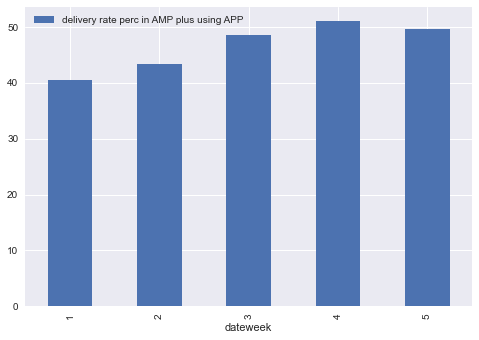

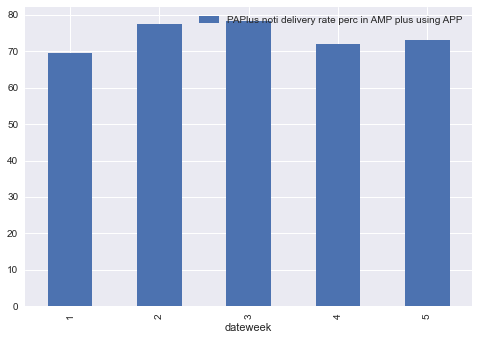

In [113]:
res.sort_values(by=['dateweek'],ascending=True).plot("dateweek", "delivery_rate_percentage", kind="bar", label = 'delivery rate perc in AMP plus using APP')
res.sort_values(by=['dateweek'],ascending=True).plot("dateweek", "delivery_rate_paplus_percentage", kind="bar", label = 'PAPlus noti delivery rate perc in AMP plus using APP')

#### Delivery rate
Using PushAMP+ is beneficial for APPs. PushAMP+ gives delivery rate % upwards of 70%
Within the apps that have used PushAmp+ too, in scenarios where pushAmp+ is not used , delivery rate hovers at 42% only

#### APPs which dont use AMP plus

In [114]:
#APPs which dont use AMP plus
res= df[(df['paplus_sent'] ==0)].groupby(['dateweek']).agg(paplus_sent=pd.NamedAgg(column='paplus_sent', aggfunc='sum'),
    paplus_imp=pd.NamedAgg(column='imp', aggfunc='sum'),
    totalnoti_sent=pd.NamedAgg(column='sent', aggfunc='sum'),
    totalnoti_imp=pd.NamedAgg(column='impressions', aggfunc='sum'),
    uniquecampaigns=pd.NamedAgg(column='cid', aggfunc='nunique'),
    ).sort_values('totalnoti_sent',ascending=False)
res['delivery_rate_percentage']=(res['totalnoti_imp']/res['totalnoti_sent'])*100
res['delivery_rate_paplus_percentage']=(res['paplus_imp']/res['paplus_sent'])*100
res.reset_index( inplace=True)
res.sort_values(by=['dateweek'],ascending=True)

,dateweek,paplus_sent,paplus_imp,totalnoti_sent,totalnoti_imp,uniquecampaigns,delivery_rate_percentage,delivery_rate_paplus_percentage
3,1,0,117,1604991087,751738511,10510,46.837551,inf
1,2,0,0,1704808482,764063917,10040,44.818167,NaN
2,3,0,177,1662915554,734155407,10987,44.148688,inf
0,4,0,89,1918138856,862214184,10498,44.950561,inf
4,5,0,0,441940473,204270797,4962,46.221337,NaN


<AxesSubplot:xlabel='dateweek'>

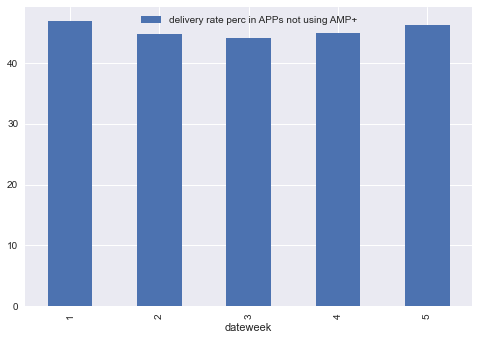

In [115]:
res.sort_values(by=['dateweek'],ascending=True).plot("dateweek", "delivery_rate_percentage", kind="bar", label = 'delivery rate perc in APPs not using AMP+')

#### Delivery rate
APPs not using PushAmp+ see a delivery rates hover at 45% only

Delivery Rates are significantly higher in Boosted Notis (70-80%) as compared to the non Boosted notis (~45%)